# <font color='#31394d'>k-Means Clustering Practice Exercise</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#31394d'>Import and Explore the Data</font>

In [2]:
df = pd.read_csv("data/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🚀 <font color='#D9C4B1'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values. Let's have a look at the distribution of the continuous variables:

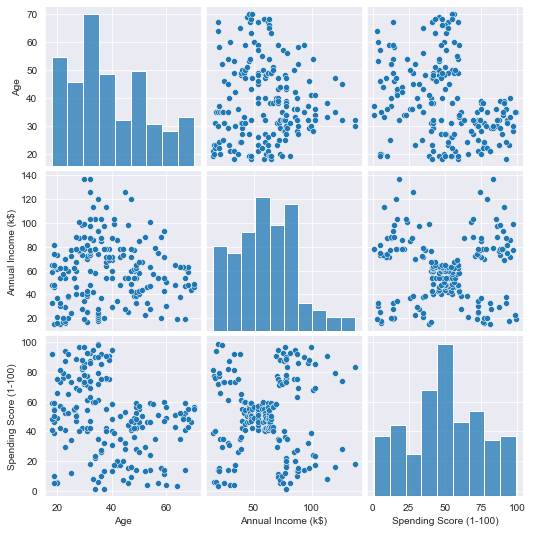

In [7]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

🚀 <font color='#D9C4B1'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [8]:
df.rename(columns={'Annual Income (k$)':'AnnualIncome', 'Spending Score (1-100)':'SpendingScore'}, inplace=True)

🚀 <font color='#D9C4B1'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

### <font color='#31394d'> Apply k-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [10]:
from sklearn.cluster import KMeans

🚀 <font color='#D9C4B1'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [11]:
?KMeans

init : {‘k-means++’, ‘random’ or an ndarray} -> Method for initialization, defaults to ‘k-means++’:

n_init : int, default: 10 -> Number of time the k-means algorithm will be run with different centroid seeds.

Let's perform k-Means clustering with k=4 (no particular reason, just as an example!)...

In [13]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

KMeans(n_clusters=4)

🚀 <font color='#D9C4B1'>Exercise: </font> What attributes does the `km` object have?

In [14]:
dir(km)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',

Let's have a look at cluster centroids:

In [15]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,43.291667,15.020833
Cluster2,30.175439,82.350877
Cluster3,55.708333,48.229167
Cluster4,27.617021,49.148936


Let's add a column with the predicted cluster label:

In [16]:
df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Let's visualize our clusters. Note that we can only do this because this is a toy example with two features (so we can plot them in a 2D space). If we had more than three features, we would not be able to visualize the clusters, but we could still examine the cluster centroids to determine what the clusters represent.

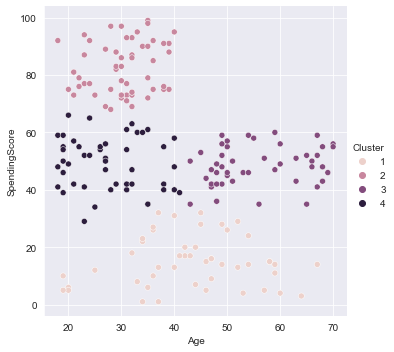

In [17]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

### <font color='#31394d'> Finding the Best k</font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of k, store the inertia and choose the best value of k using the "elbow" method. 

In [18]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

C:\Users\danww\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
inertia

[171535.5,
 75949.15601023017,
 45840.67661610866,
 28165.58356662934,
 23839.262483341663,
 19502.407839362204,
 15514.19313435103,
 13012.800984809692,
 11522.765949793671,
 10111.344136540847,
 9367.126464259281,
 8644.439475915531,
 7933.505207961973,
 7229.487285794986,
 6607.432631828954,
 6413.880487649605,
 5810.6815066363015,
 5168.535117986588,
 5046.024496418615,
 4832.524475850946]

<AxesSubplot:>

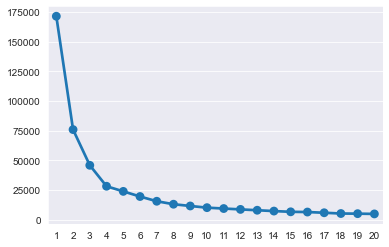

In [20]:
sns.pointplot(x=np.arange(1,21), y=inertia)

🚀 <font color='#D9C4B1'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

4 clusters as the elbow is at 4. Any value of K beyond this may lead to over fitting.

In [ ]:
# 4 clusters